<a href="https://colab.research.google.com/github/Frost-Codes/Cat-Dog-Binary-Classification/blob/main/CatsDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*** Dog cat binary classification using Convent 😍 ***

In [ ]:
import numpy as np
import random
import cv2
import os
from matplotlib import pyplot as plt

In [ ]:
os.chdir('../')

In [ ]:
os.chdir('./root')

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.mkdir('./.kaggle')

In [ ]:
os.chdir('./.kaggle')

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ianmurimi","key":"21c4ce383f867dc7493b89d5430c55d4"}'}

In [ ]:
os.chdir('../')

In [ ]:
os.chdir('./content')

In [ ]:
os.listdir()

['.config', 'sample_data']

In [ ]:
! chmod 600 /root/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset

100% 786M/788M [00:38<00:00, 24.0MB/s]
100% 788M/788M [00:38<00:00, 21.3MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.listdir()

['.config', '.data', 'sample_data']

In [ ]:
os.mkdir('.data')

In [ ]:
! cp microsoft-catsvsdogs-dataset.zip .data/

In [ ]:
os.listdir('./.data')

['PetImages',
 'MSR-LA - 3467.docx',
 'readme[1].txt',
 'microsoft-catsvsdogs-dataset.zip']

In [ ]:
os.remove('./microsoft-catsvsdogs-dataset.zip')

In [ ]:
os.chdir('./.data')

In [ ]:
! unzip microsoft-catsvsdogs-dataset.zip

In [ ]:
os.listdir()

['PetImages',
 'MSR-LA - 3467.docx',
 'readme[1].txt',
 'microsoft-catsvsdogs-dataset.zip']

In [ ]:
os.listdir('PetImages')

['Cat', 'Dog']

In [ ]:
! unzip microsoft-catsvsdogs-dataset.zip

In [ ]:
os.listdir()

['MSR-LA - 3467.docx',
 'PetImages',
 'readme[1].txt',
 'microsoft-catsvsdogs-dataset.zip']

In [ ]:
os.chdir('./PetImages')

In [ ]:
os.listdir()

['Cat', 'Dog']

In [ ]:
os.getcwd()

'/content/.data'

In [ ]:
os.chdir('../')

In [ ]:
os.getcwd()

'/content/.data'

In [ ]:
DIRECTORY = r'./PetImages'
CATEGORIES = ['Dog', 'Cat']
IMAGE_SIZE = 100

In [ ]:
data = []
for category in CATEGORIES:
  non_fixed = 0
  folder = os.path.join(DIRECTORY, category)
  label = CATEGORIES.index(category) # index 0 is dog index 1 is cat
  for image in os.listdir(folder):
    image_path = os.path.join(folder, image)
    try:
      image_array = cv2.imread(image_path)
      image_array = cv2.resize(image_array, (IMAGE_SIZE, IMAGE_SIZE))
      data.append([image_array, label])
    except:
      non_fixed +=1
  print(f'{category} non fixed: {non_fixed}')

Dog non fixed: 31
Cat non fixed: 25


In [ ]:
len(data)

24946

In [ ]:
random.shuffle(data)

In [ ]:
x = []
y = []

In [ ]:
for feature, label in data:
  x.append(feature)
  y.append(label)

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
print(len(x))
print(len(y))

24946
24946


In [ ]:
## data scale down

In [ ]:
## splitting features
x_train = x[:16000]
x_test = x[21000:]

In [ ]:
## splitting labels
y_train = y[:16000]
y_test = y[21000:]

In [ ]:
## Model Phase

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())

model.add(Dense(64, activation='relu', input_shape=x_train.shape[1:]))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)       0

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
              metrics=['accuracy']) # adams optimizer  and sparse_categorical_crossentropy loss with 20 epoch accuracy is 80%

In [ ]:
print(x_train.shape)
print(y_train.shape)

(16000, 100, 100, 3)
(16000,)


In [ ]:
## Scaling down features
x_train = np.divide(x_train, 255)
x_test = np.divide(x_test, 255)

In [ ]:
history = model.fit(x_train, y_train, epochs=15, validation_split=(0.1), batch_size=128)

Epoch 1/15
113/113 [==============================] - 18s 52ms/step - loss: 0.6945 - accuracy: 0.5119 - val_loss: 0.6783 - val_accuracy: 0.6288
Epoch 2/15
113/113 [==============================] - 5s 41ms/step - loss: 0.6586 - accuracy: 0.6081 - val_loss: 0.6164 - val_accuracy: 0.6556
Epoch 3/15
113/113 [==============================] - 5s 43ms/step - loss: 0.5959 - accuracy: 0.6750 - val_loss: 0.5382 - val_accuracy: 0.7394
Epoch 4/15
113/113 [==============================] - 5s 41ms/step - loss: 0.5370 - accuracy: 0.7319 - val_loss: 0.5029 - val_accuracy: 0.7581
Epoch 5/15
113/113 [==============================] - 5s 42ms/step - loss: 0.4855 - accuracy: 0.7665 - val_loss: 0.4687 - val_accuracy: 0.7713
Epoch 6/15
113/113 [==============================] - 5s 43ms/step - loss: 0.4462 - accuracy: 0.7919 - val_loss: 0.4352 - val_accuracy: 0.7994
Epoch 7/15
113/113 [==============================] - 5s 41ms/step - loss: 0.4082 - accuracy: 0.8134 - val_loss: 0.4515 - val_accuracy: 0.773

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
train_accuracy = history_dict['accuracy']
validation_accuracy = history_dict['val_accuracy']
epochs = range(1, len(validation_accuracy)+1)

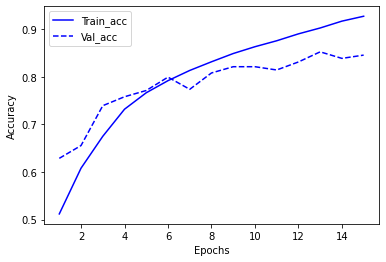

In [ ]:
plt.plot(epochs, train_accuracy, 'b', label='Train_acc')
plt.plot(epochs, validation_accuracy, 'b--', label='Val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
x_test.shape

(3946, 100, 100, 3)

In [ ]:
import gc

In [ ]:
gc.collect()

235

In [ ]:
predictions = model.predict(x_test)

124/124 [==============================] - 1s 5ms/step


In [ ]:
model.evaluate(x_test, y_test)

124/124 [==============================] - 1s 8ms/step - loss: 0.3953 - accuracy: 0.8555


[0.39529716968536377, 0.8555499315261841]

In [ ]:
x_test_first = x[21000]
y_test_first = y[21000]

In [ ]:
y_test_first ## label shows cat (index of cat)

1

In [ ]:
predictions[0] # prediction close to 1

array([0.9995314], dtype=float32)

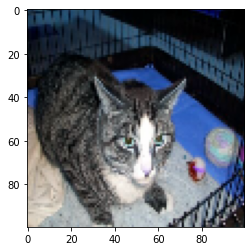

In [ ]:
plt.imshow(x_test_first)